In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df_raw = pd.read_csv("data_full 28.11 20-00.csv", sep=',').drop("Unnamed: 0", axis=1)

In [4]:
df_raw

,name,person_status,url,start_date,answer_time,first_sold_time,n_active,n_finished,active_finished_ratio,min_active_cost,max_active_cost,mean_active_cost,min_finished_cost,max_finished_cost,mean_finished_cost
0,юлия,частное лицо,https://www.avito.ru/user/e675b5aa6a59a49a07f1...,735933.0,NaN,736637.0,5,4,1.200000,700.0,2000.0,1.500000e+03,1500.0,48000.0,1.425000e+04
1,тимур,частное лицо,https://www.avito.ru/user/fe7fd0b1265035089870...,736238.0,"Редко отвечает на сообщения, рекомендуем звонить",736569.0,9,38,0.256410,15000.0,160000.0,9.500000e+04,6000.0,135000.0,3.096579e+04
2,мария,частное лицо,https://www.avito.ru/user/00713ae8806f3a6463b0...,734289.0,Отвечает за несколько часов,736932.0,17,7,2.250000,150.0,20000.0,1.926471e+03,100.0,3600.0,1.000000e+03
3,рина,частное лицо,https://www.avito.ru/user/df057f65bea189cfcfe8...,736968.0,Отвечает за несколько часов,736996.0,6,1,3.500000,50.0,1300.0,4.416667e+02,230.0,230.0,2.300000e+02
4,ольга,компания,https://www.avito.ru/user/73faa702e229be14ee50...,735203.0,Отвечает за несколько часов,735780.0,41,81,0.512195,500.0,8000.0,2.036585e+03,0.0,12000.0,1.777160e+03
5,евгения,компания,https://www.avito.ru/user/292a5d464b5b1598b584...,735354.0,Отвечает около часа,736479.0,397,500,0.794411,0.0,15500.0,1.963970e+03,0.0,5000.0,1.974602e+03
6,сергей,частное лицо,https://www.avito.ru/user/ec257431fa5020bf1ac9...,736634.0,NaN,736980.0,1,1,1.000000,7500.0,7500.0,7.500000e+03,3000.0,3000.0,3.000000e+03
7,алена,частное лицо,https://www.avito.ru/user/bc898532fe9ef04c902a...,735872.0,Отвечает в течение дня,736808.0,5,21,0.272727,600.0,3300.0,2.100000e+03,200.0,600000.0,2.972857e+04
8,александр,частное лицо,https://www.avito.ru/user/120e35347244a611cd2a...,736726.0,NaN,736914.0,6,3,1.750000,1000.0,3000.0,1.500000e+03,9000.0,35000.0,1.966667e+04
9,елена,частное лицо,https://www.avito.ru/user/f4d03a65dd3e3c6fd597...,735964.0,"Редко отвечает на сообщения, рекомендуем звонить",736377.0,5,18,0.315789,400.0,2200.0,8.800000e+02,30.0,500.0,2.572222e+02


In [5]:
df = df_raw.copy()

In [6]:
list(df_raw.person_status.unique())

['частное лицо', 'компания', 'магазин']

In [7]:
def min_cost_general(n_act, n_fin, min_act, min_fin):
    return np.minimum(min_fin.fillna(np.inf), min_act.fillna(np.inf))

def max_cost_general(n_act, n_fin, max_act, max_fin):
    return np.maximum(max_fin.fillna(-1), max_act.fillna(-1))

def mean_cost_general(n_act, n_fin, mean_act, mean_fin):
    return (mean_act.fillna(0) * n_act + mean_fin.fillna(0) * n_fin) / (n_act + n_fin)

In [8]:
anstime_mapping = dict(zip(list(df.answer_time.unique()), [0,1,2,3,4,5]))

In [9]:
status_mapping = dict(zip(list(df.person_status.unique()), [0,1,2,3]))

In [10]:
df.replace({'answer_time': anstime_mapping, 'person_status': status_mapping}, inplace=True)

In [11]:
df.drop(["url", "name"], axis=1, inplace=True)

In [12]:
df_raw.columns

Index(['name', 'person_status', 'url', 'start_date', 'answer_time',
       'first_sold_time', 'n_active', 'n_finished', 'active_finished_ratio',
       'min_active_cost', 'max_active_cost', 'mean_active_cost',
       'min_finished_cost', 'max_finished_cost', 'mean_finished_cost'],
      dtype='object')

In [13]:
df["min_general_cost"] = min_cost_general(df.n_active, df.n_finished, df.min_active_cost, df.min_finished_cost)
df["max_general_cost"] = max_cost_general(df.n_active, df.n_finished, df.max_active_cost, df.max_finished_cost)
df["mean_general_cost"] = mean_cost_general(df.n_active, df.n_finished, df.mean_active_cost, df.mean_finished_cost)

In [14]:
df[df.mean_general_cost == np.nan]

,person_status,start_date,answer_time,first_sold_time,n_active,n_finished,active_finished_ratio,min_active_cost,max_active_cost,mean_active_cost,min_finished_cost,max_finished_cost,mean_finished_cost,min_general_cost,max_general_cost,mean_general_cost


In [15]:
df[df.n_active + df.n_finished == 0]

,person_status,start_date,answer_time,first_sold_time,n_active,n_finished,active_finished_ratio,min_active_cost,max_active_cost,mean_active_cost,min_finished_cost,max_finished_cost,mean_finished_cost,min_general_cost,max_general_cost,mean_general_cost
144,0,736085.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
677,0,736938.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
691,0,734716.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
1099,0,736695.0,1,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
1193,0,735203.0,2,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
2317,0,736907.0,2,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
2640,0,736511.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
3212,0,736361.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
3900,0,736603.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN
4389,0,735872.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,inf,-1.0,NaN


In [16]:
df.iloc[144]

person_status            0.000000e+00
start_date               7.360850e+05
answer_time              0.000000e+00
first_sold_time                   NaN
n_active                 0.000000e+00
n_finished               0.000000e+00
active_finished_ratio    1.000000e+00
min_active_cost                   NaN
max_active_cost                   NaN
mean_active_cost                  NaN
min_finished_cost                 NaN
max_finished_cost                 NaN
mean_finished_cost                NaN
min_general_cost                  inf
max_general_cost        -1.000000e+00
mean_general_cost                 NaN
Name: 144, dtype: float64

In [17]:
df["min_general_cost"][df["min_general_cost"] == np.inf] = np.nan
df["max_general_cost"][df["max_general_cost"] < 0] = np.nan

/home/garx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/garx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df.iloc[144]

person_status                 0.0
start_date               736085.0
answer_time                   0.0
first_sold_time               NaN
n_active                      0.0
n_finished                    0.0
active_finished_ratio         1.0
min_active_cost               NaN
max_active_cost               NaN
mean_active_cost              NaN
min_finished_cost             NaN
max_finished_cost             NaN
mean_finished_cost            NaN
min_general_cost              NaN
max_general_cost              NaN
mean_general_cost             NaN
Name: 144, dtype: float64

In [19]:
df.dropna(subset=["min_general_cost"], inplace=False).shape

(5061, 16)

In [20]:
df[df.n_active + df.n_finished == 0]

,person_status,start_date,answer_time,first_sold_time,n_active,n_finished,active_finished_ratio,min_active_cost,max_active_cost,mean_active_cost,min_finished_cost,max_finished_cost,mean_finished_cost,min_general_cost,max_general_cost,mean_general_cost
144,0,736085.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,0,736938.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
691,0,734716.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,0,736695.0,1,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,0,735203.0,2,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2317,0,736907.0,2,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640,0,736511.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3212,0,736361.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3900,0,736603.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4389,0,735872.0,0,NaN,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df

,person_status,start_date,answer_time,first_sold_time,n_active,n_finished,active_finished_ratio,min_active_cost,max_active_cost,mean_active_cost,min_finished_cost,max_finished_cost,mean_finished_cost,min_general_cost,max_general_cost,mean_general_cost
0,0,735933.0,0,736637.0,5,4,1.200000,700.0,2000.0,1.500000e+03,1500.0,48000.0,1.425000e+04,700.0,48000.0,7.166667e+03
1,0,736238.0,1,736569.0,9,38,0.256410,15000.0,160000.0,9.500000e+04,6000.0,135000.0,3.096579e+04,6000.0,160000.0,4.322766e+04
2,0,734289.0,2,736932.0,17,7,2.250000,150.0,20000.0,1.926471e+03,100.0,3600.0,1.000000e+03,100.0,20000.0,1.656250e+03
3,0,736968.0,2,736996.0,6,1,3.500000,50.0,1300.0,4.416667e+02,230.0,230.0,2.300000e+02,50.0,1300.0,4.114286e+02
4,1,735203.0,2,735780.0,41,81,0.512195,500.0,8000.0,2.036585e+03,0.0,12000.0,1.777160e+03,0.0,12000.0,1.864344e+03
5,1,735354.0,3,736479.0,397,500,0.794411,0.0,15500.0,1.963970e+03,0.0,5000.0,1.974602e+03,0.0,15500.0,1.969896e+03
6,0,736634.0,0,736980.0,1,1,1.000000,7500.0,7500.0,7.500000e+03,3000.0,3000.0,3.000000e+03,3000.0,7500.0,5.250000e+03
7,0,735872.0,4,736808.0,5,21,0.272727,600.0,3300.0,2.100000e+03,200.0,600000.0,2.972857e+04,200.0,600000.0,2.441538e+04
8,0,736726.0,0,736914.0,6,3,1.750000,1000.0,3000.0,1.500000e+03,9000.0,35000.0,1.966667e+04,1000.0,35000.0,7.555556e+03
9,0,735964.0,1,736377.0,5,18,0.315789,400.0,2200.0,8.800000e+02,30.0,500.0,2.572222e+02,30.0,2200.0,3.926087e+02


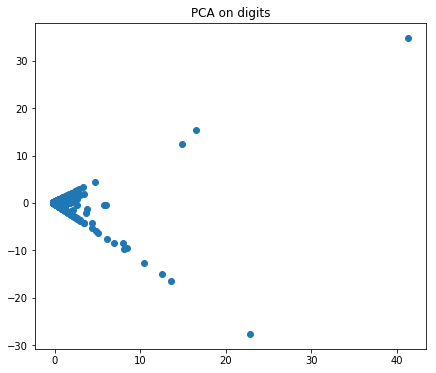

In [22]:
scaler = StandardScaler()
pca_scaler = PCA(n_components=2, random_state=140)
data_pca = scaler.fit_transform(pca_scaler.fit_transform(df.dropna().values))
plt.figure(figsize=(7, 6))
plt.title('PCA on digits')
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

In [23]:
df.columns

Index(['person_status', 'start_date', 'answer_time', 'first_sold_time',
       'n_active', 'n_finished', 'active_finished_ratio', 'min_active_cost',
       'max_active_cost', 'mean_active_cost', 'min_finished_cost',
       'max_finished_cost', 'mean_finished_cost', 'min_general_cost',
       'max_general_cost', 'mean_general_cost'],
      dtype='object')

In [24]:
cols = ['person_status',
        'start_date',
        'answer_time',
        'first_sold_time',
        'n_active',
        'n_finished',
        'active_finished_ratio',
        'min_active_cost',
        'max_active_cost',
        'mean_active_cost',
        'min_finished_cost',
        'max_finished_cost',
        'mean_finished_cost',
        'min_general_cost',
        'max_general_cost',
        'mean_general_cost',
       ]
cols2 = ['person_status',
        'start_date',
        'answer_time',
        'first_sold_time',
        'n_active',
        'n_finished',
        'active_finished_ratio',
        'min_general_cost',
        'max_general_cost',
        'mean_general_cost',
       ]

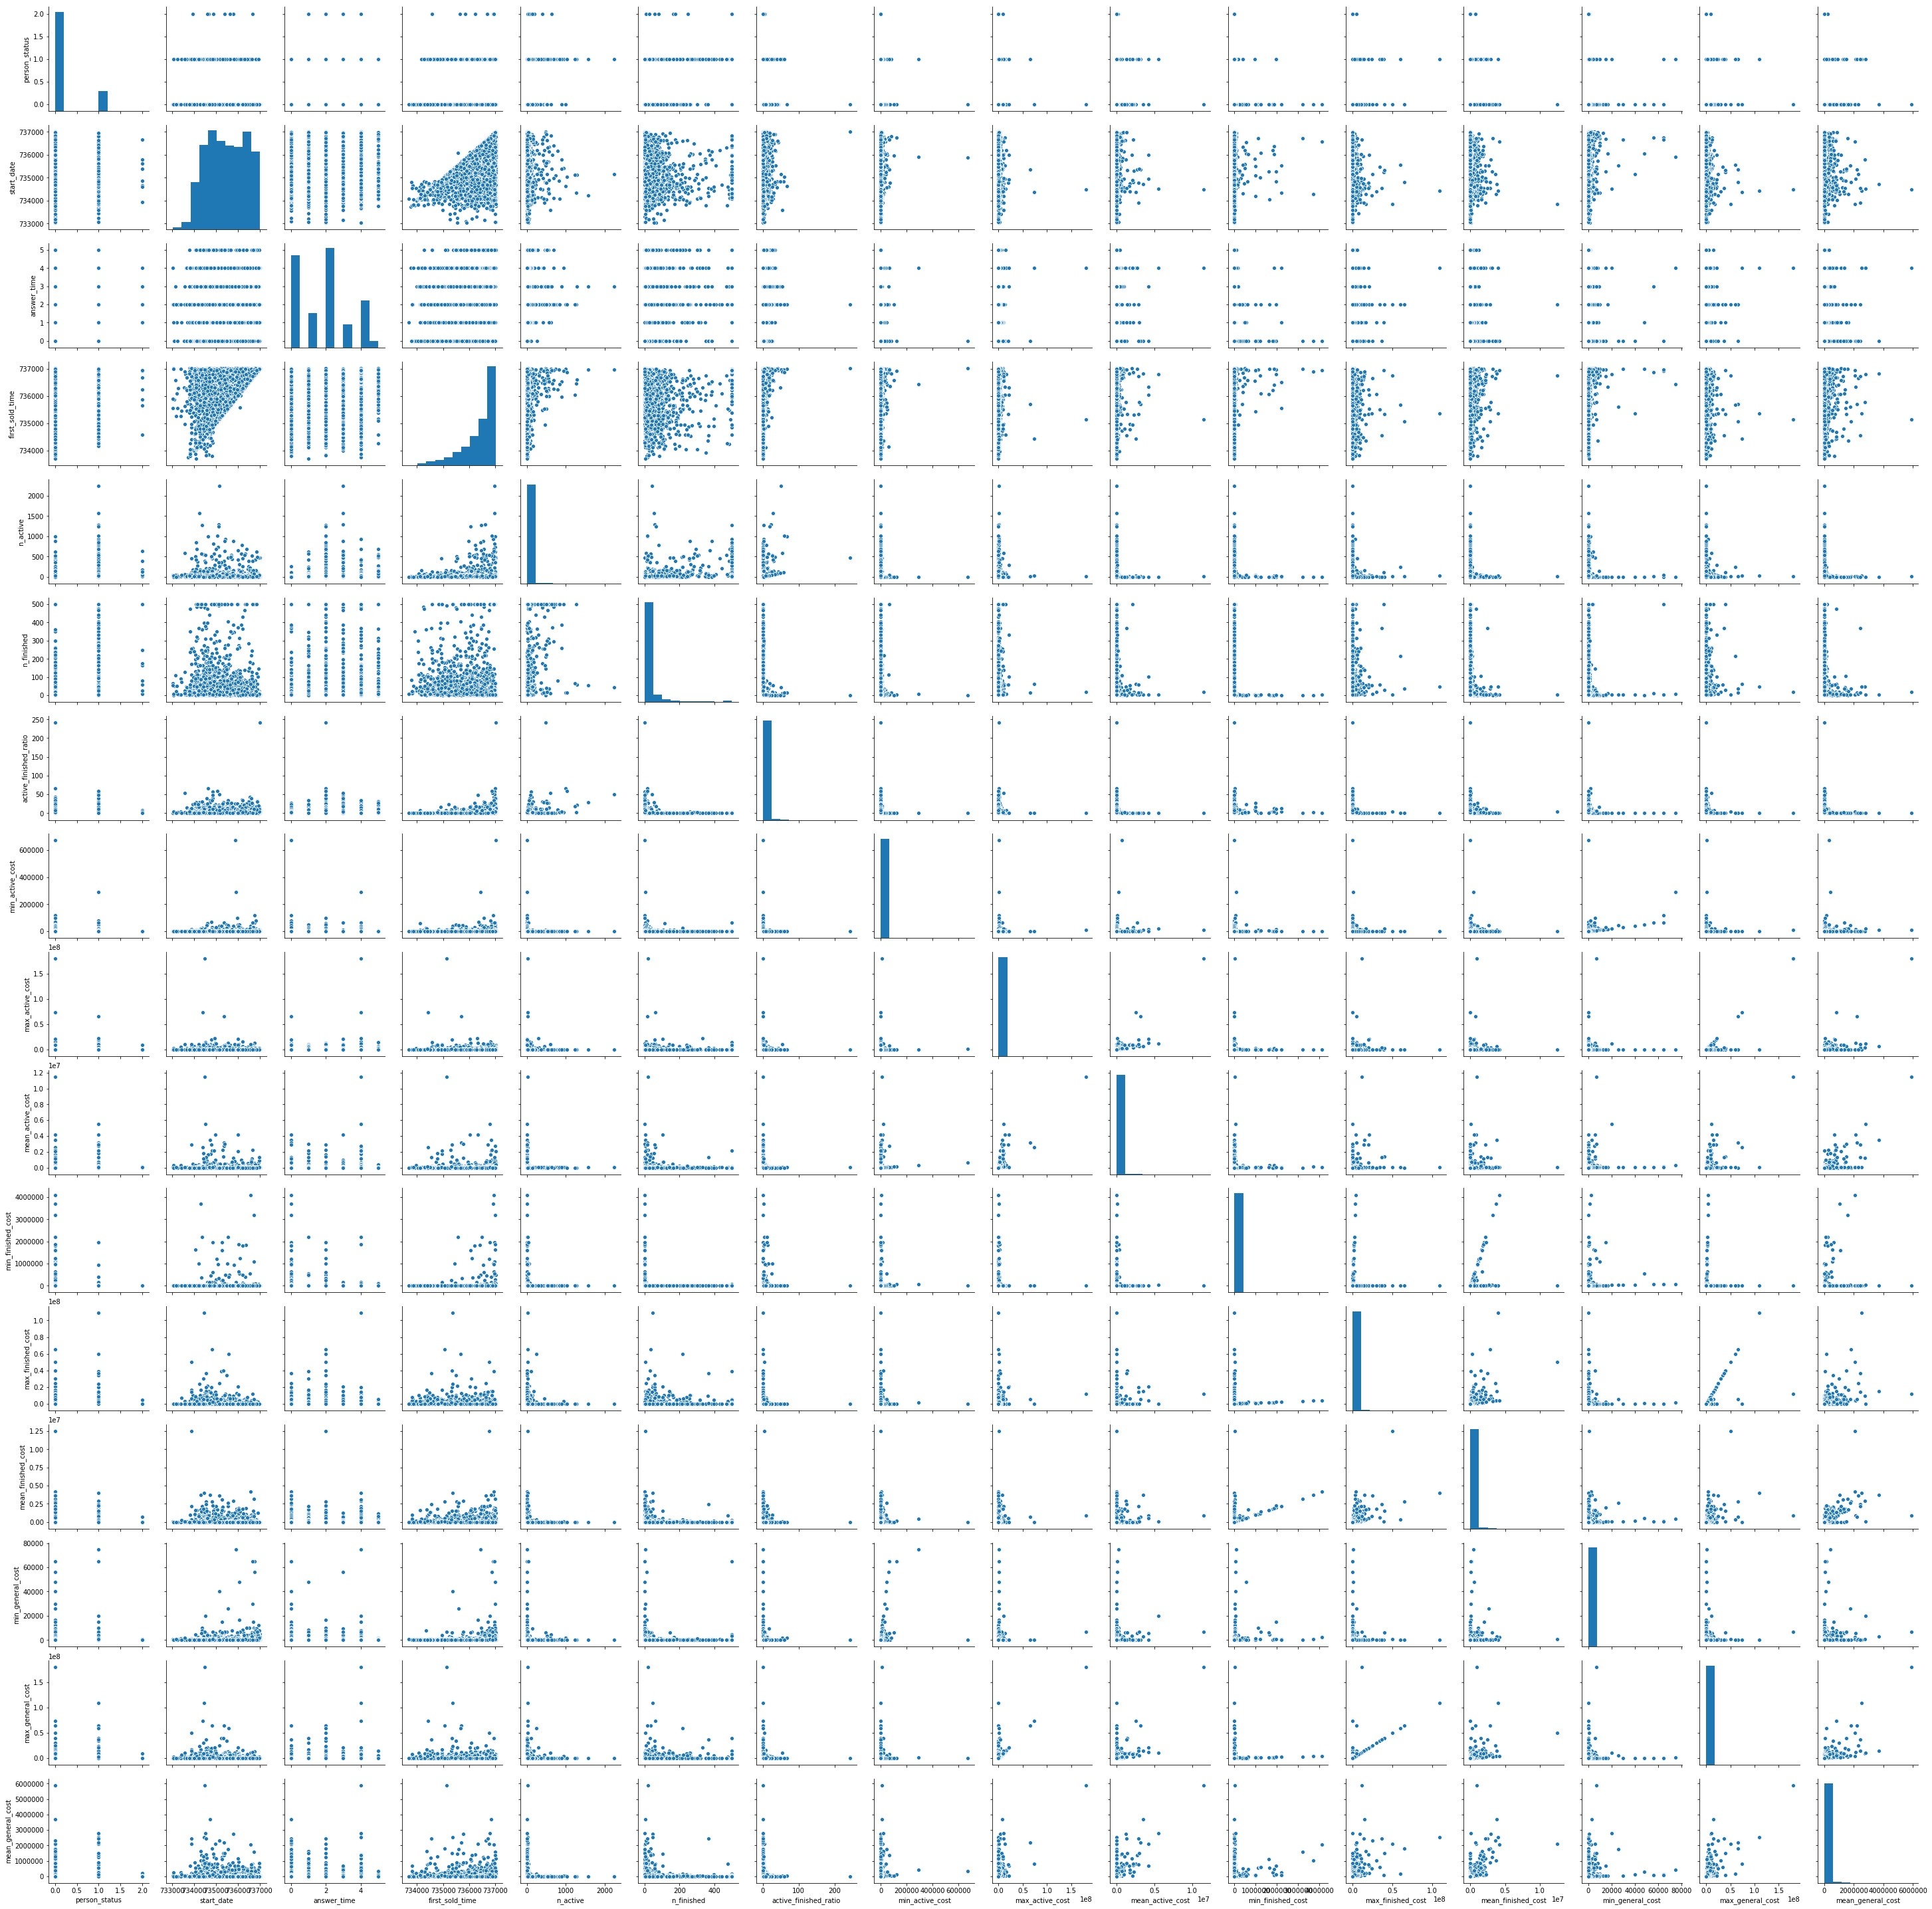

In [25]:
sns.pairplot(df[cols].dropna(), kind='scatter')

/home/garx/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/garx/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/garx/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/garx/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


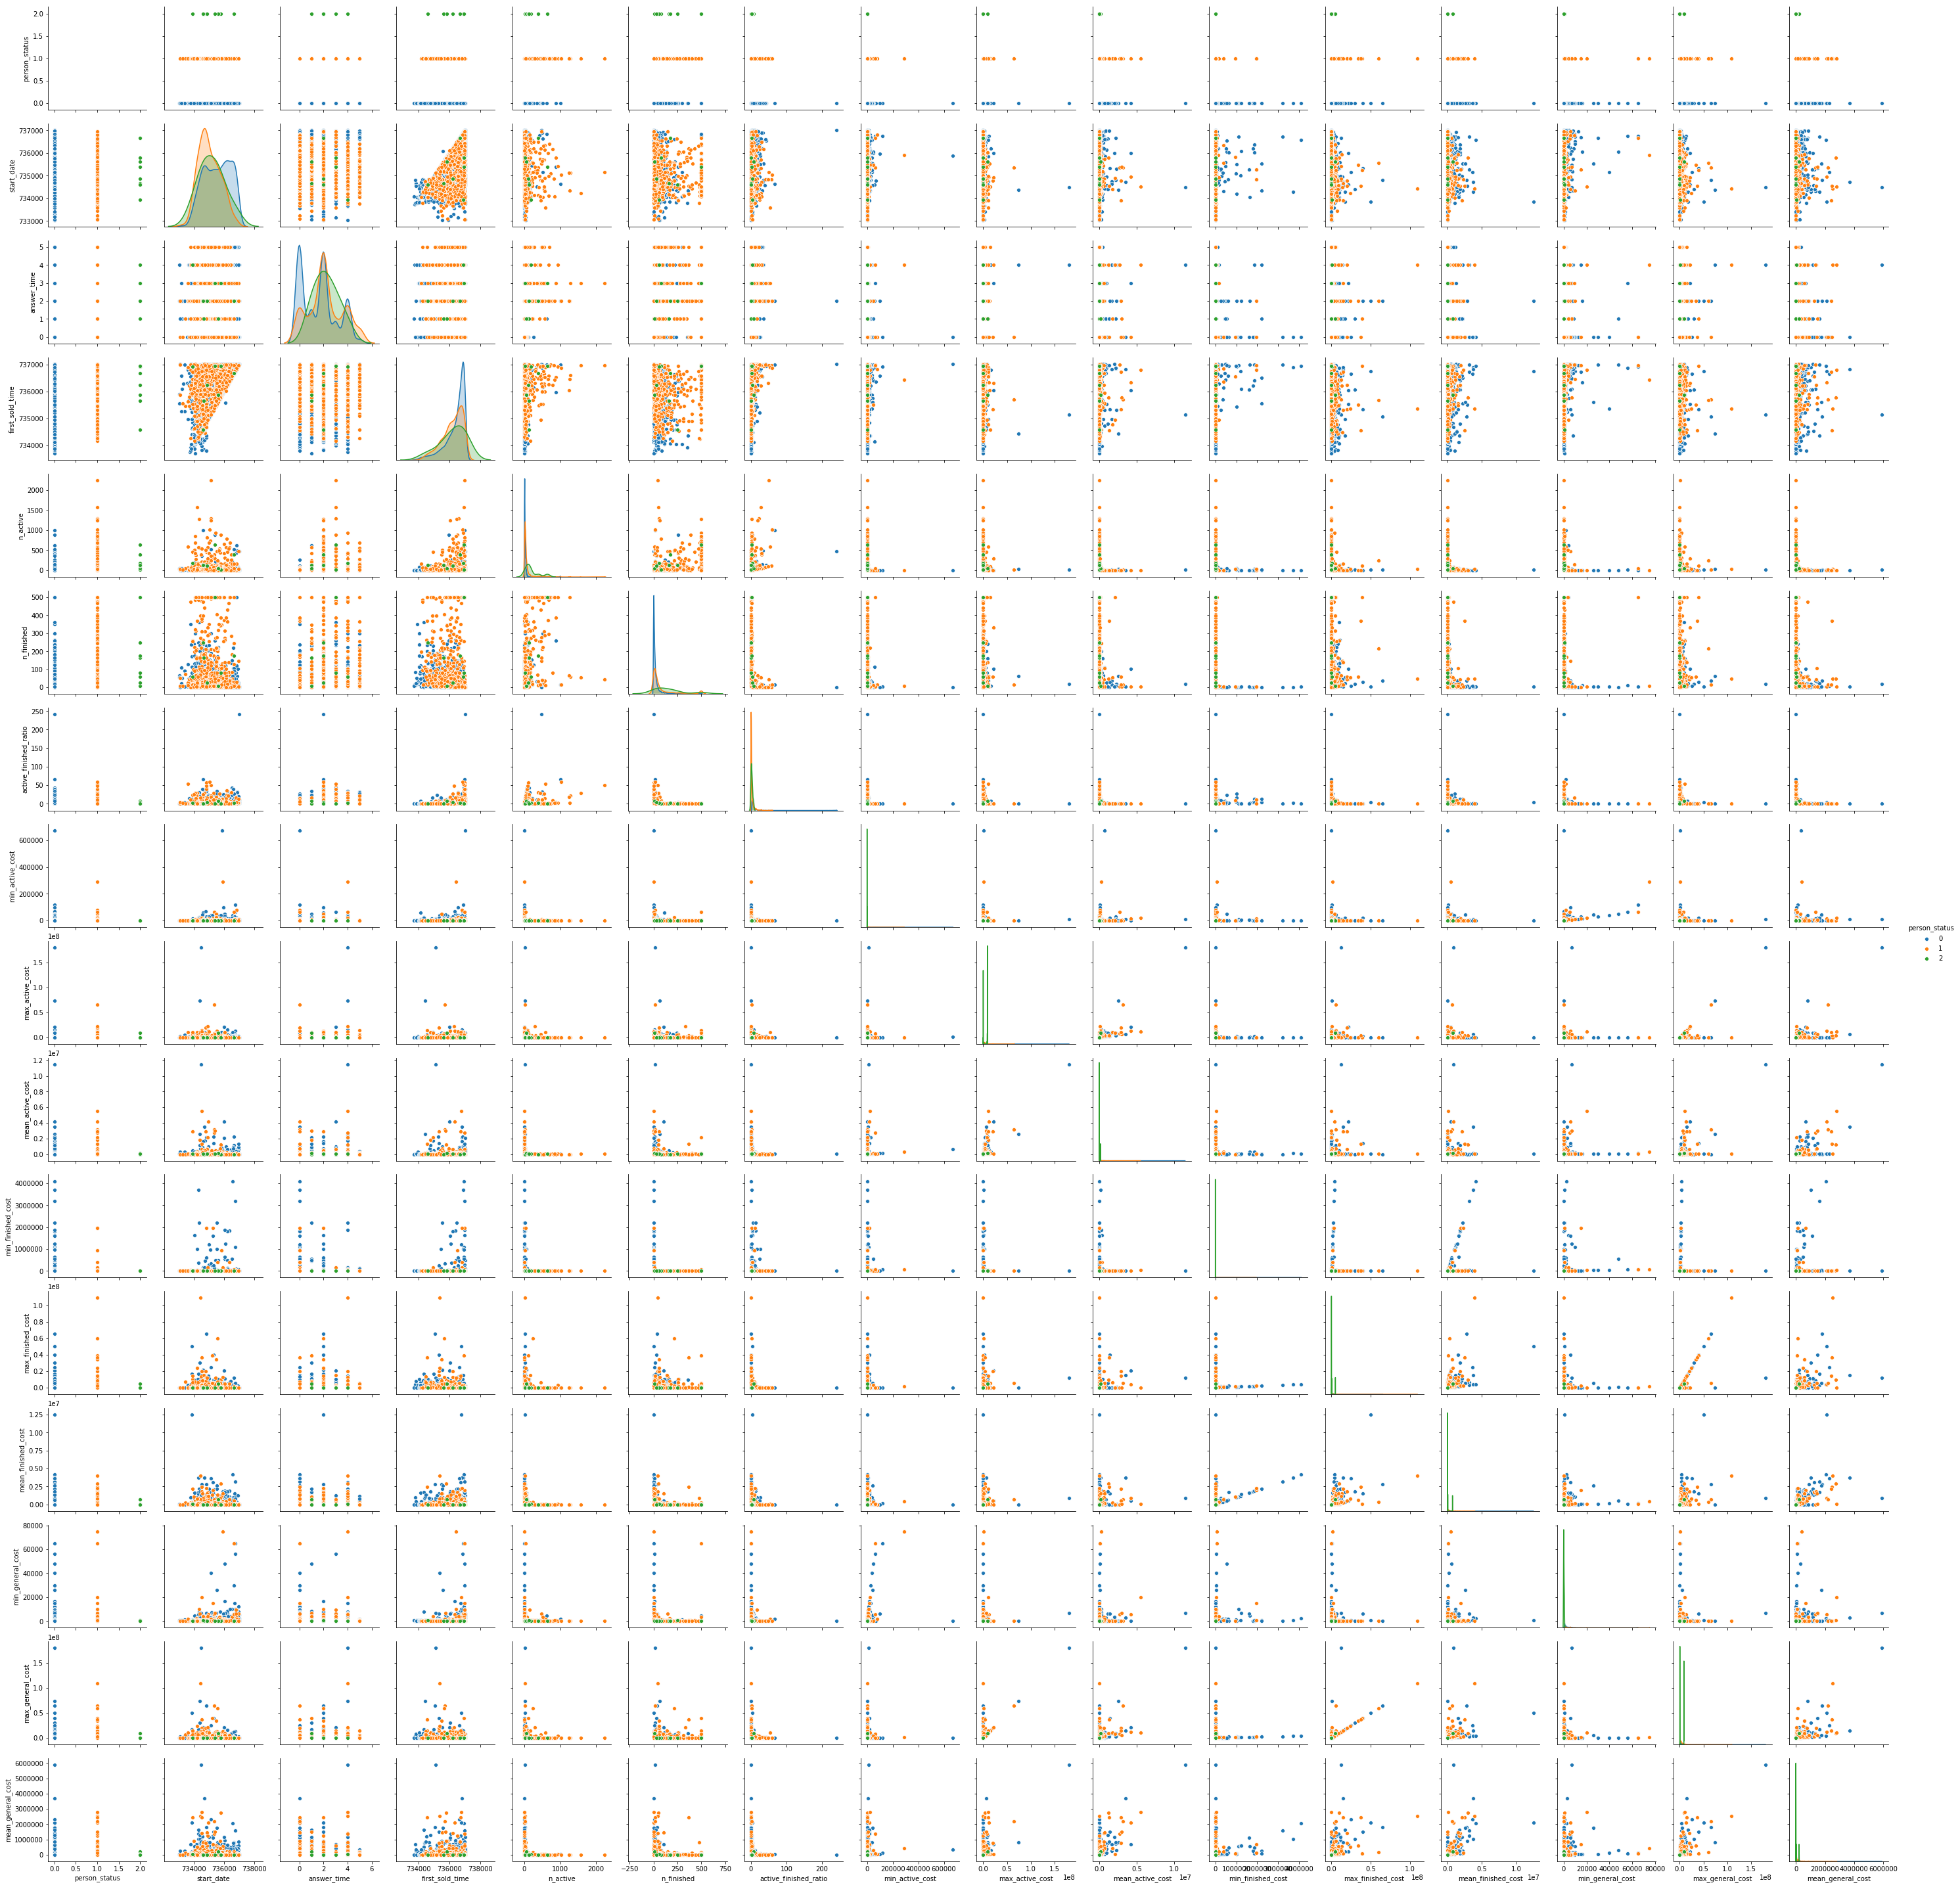

In [26]:
sns.pairplot(df[cols].dropna(), kind='scatter', hue='person_status')

/home/garx/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/garx/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/garx/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/garx/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


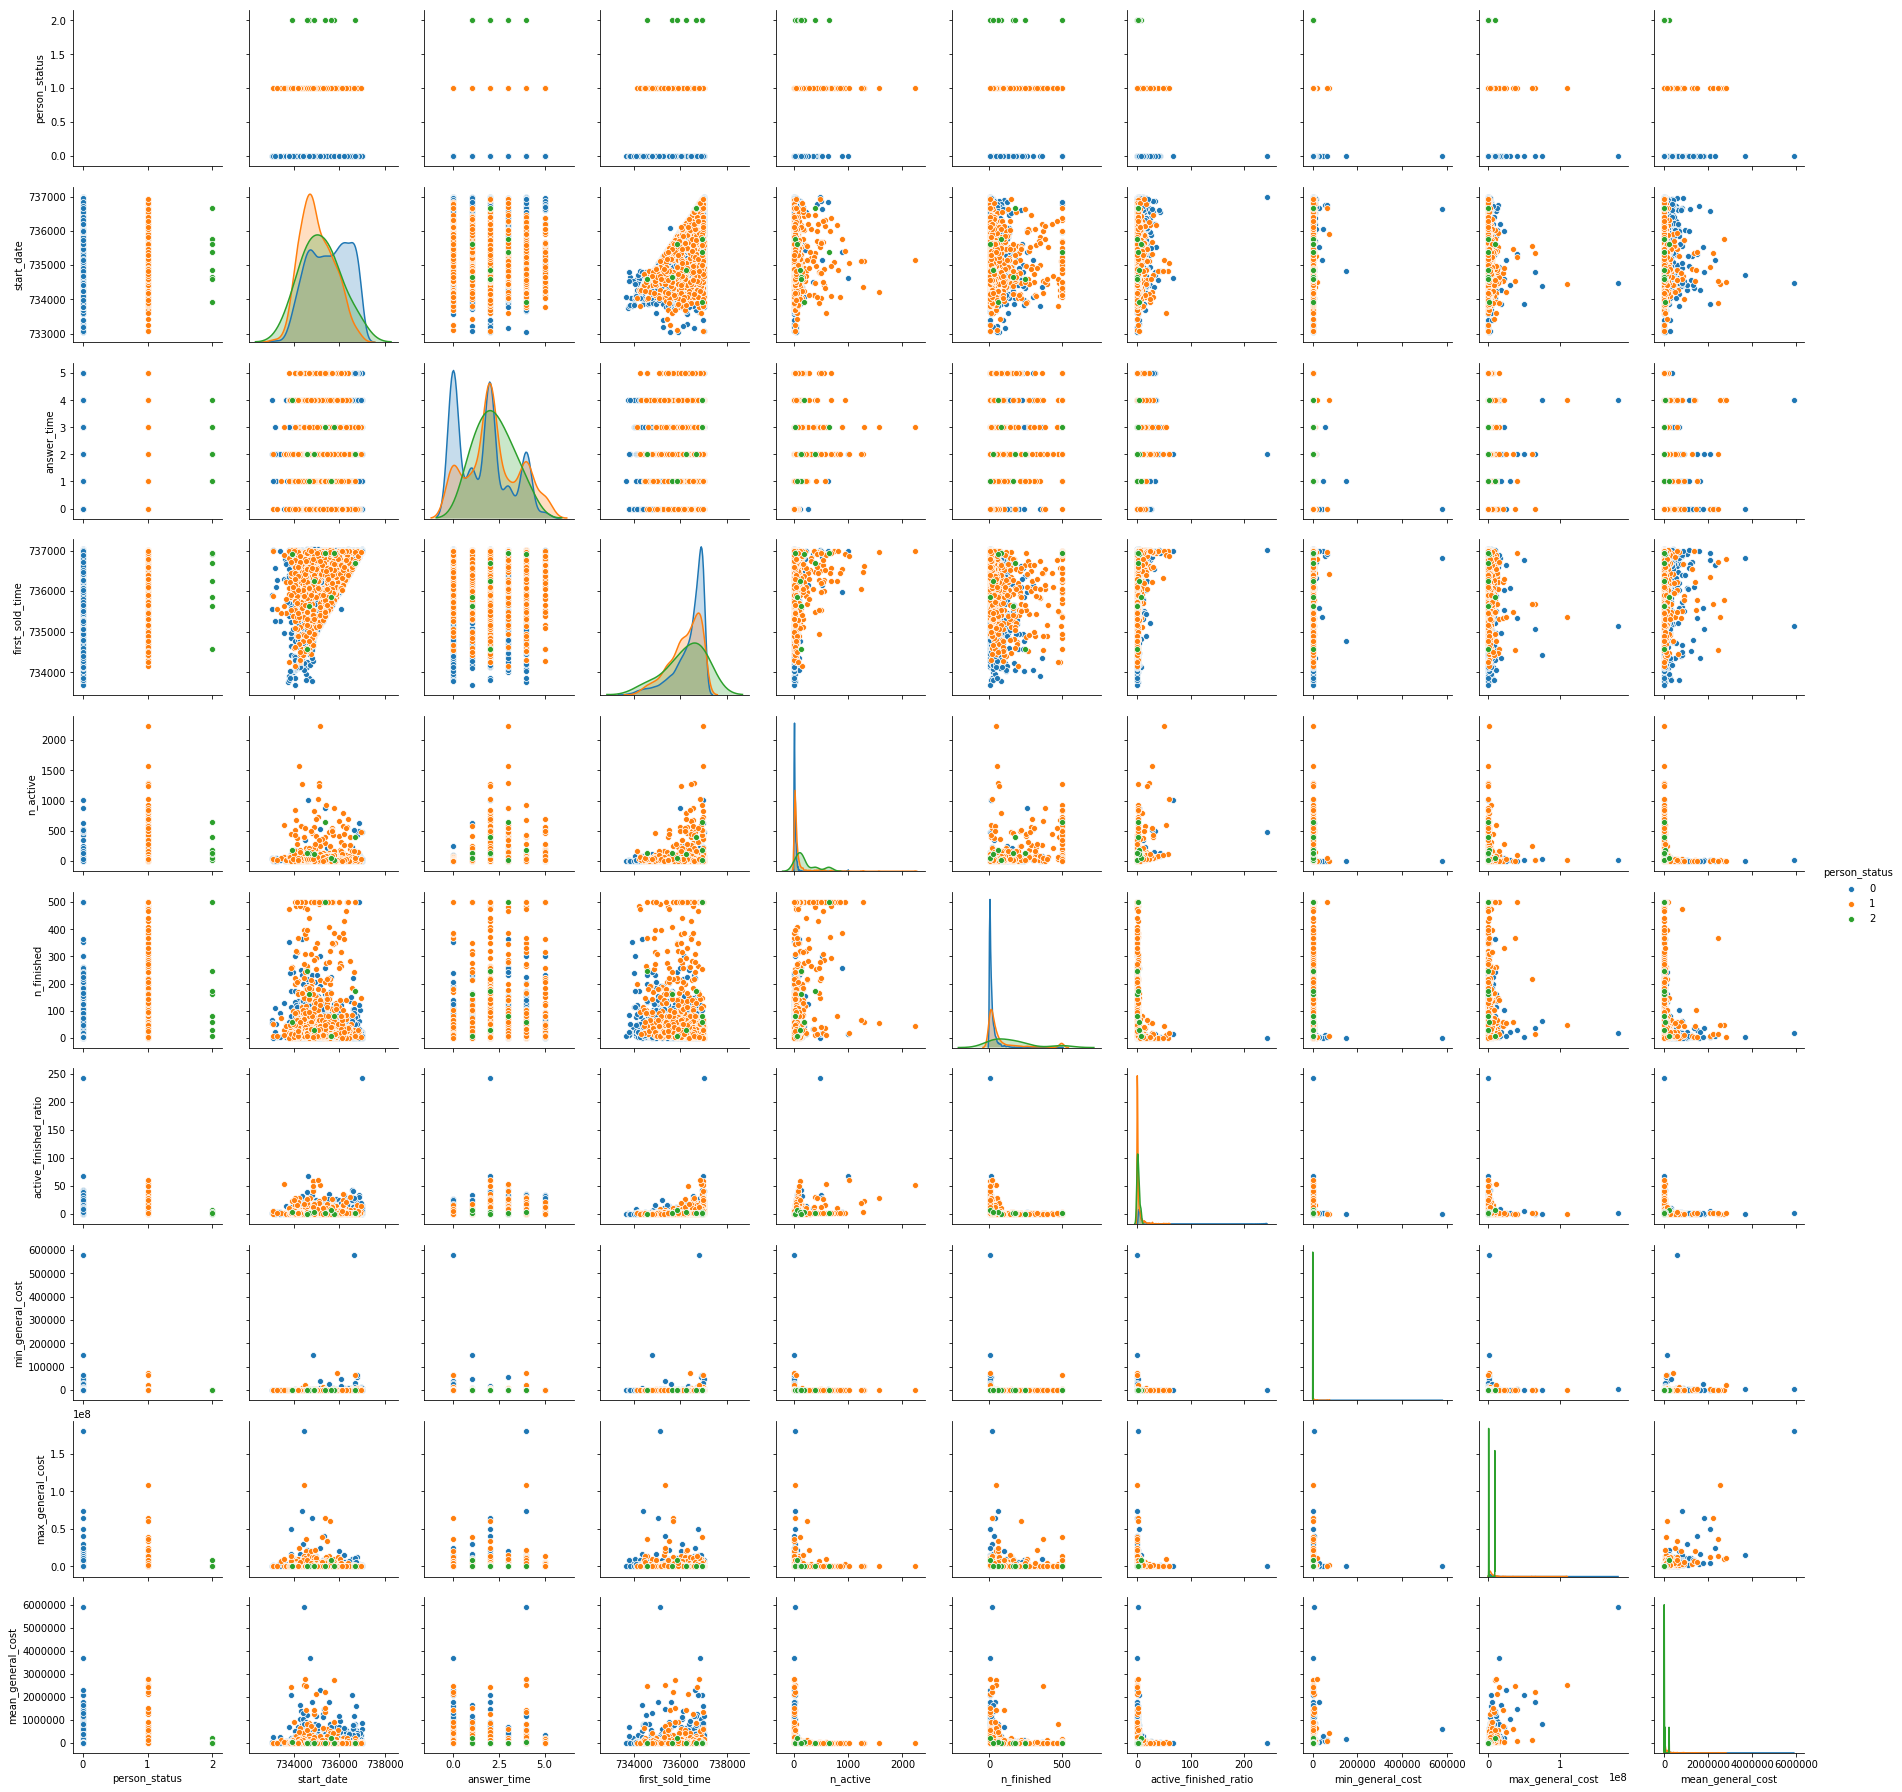

In [27]:
sns.pairplot(df[cols2].dropna(), kind='scatter', hue='person_status')

In [37]:
df.person_status.value_counts()

0    4284
1     784
2       8
Name: person_status, dtype: int64